# Graph convolutional Network

This tutorial based on [Theoretical Foundations of Graph Neural Networks](https://www.youtube.com/watch?v=uF53xsT7mjc) and [Graph Neural Networks](https://www.youtube.com/playlist?list=PLSgGvve8UweGx4_6hhrF3n4wpHf_RV76_)

### Preliminaries

####  1. Permutation Invariance Property
Let $X \in \mathbb{R}^{N \times d}$ be a matrix of node feature vectors and P be a permutation e.g. a permutation (2,4,1,3) means $$ x_2 -> y_1, x_4 -> y_2, x_1 -> y_3,x_3 -> y_4$$.

$$ f(PX) = f(X)$$


$$f(X) = \phi (\sum_{i \in V} \psi(x_i))$$

where $V$ is a set of nodes, $\phi$ and $\psi$ are learnable functions, e.g., MLP.

####  2. Permutation Equivariance property

$$ f(PX) = Pf(X)$$

#### 3. Learning on sets and graphs

Think of equivariant set functions as transofmring each node input $x_i$ into latent vector $h_i$.

$$ h_i = \psi(x_i) $$


### $$ f(\textbf{X}) = \phi (\Phi_{i \in V} \psi(x_i)) $$

where $\Phi$ is a permutation-invariant aggregator ( e.g., sum,avg,max).


Let $A$ be a binary adjacency matrix.

#### Invariance $ f(PX, PAP^T) = f(X, A)$
#### Equivariance $ f(PX, PAP^T) = Pf(X, A)$


1-Hop neighbourhood Neighbors of i.th node:
$$ \mathcal{N}_i = \{ j, (i,j) \in \mathcal{E} \vee (j,i) \in \mathcal{E} \} $$


$$ 
f(\textbf{X},\textbf{A})=\begin{bmatrix} 
- \quad g( \textbf{x}_1, \textbf{X}_{\mathcal{N}_1} ) \quad-\\
- \quad g( \textbf{x}_2, \textbf{X}_{\mathcal{N}_2} ) \quad-\\
\cdots \\
- \quad g( \textbf{x}_n, \textbf{X}_{\mathcal{N}_n} ) \quad-\\
\end{bmatrix} 
$$

g should be also permutation invariant.



# Graph Convolutional Neural Network


$$ h_i = \phi \, \Big( x_i , \Phi_{j \in \mathcal{N}_i} c_{ij} \, \psi(x_i) \Big)$$
where features of neighbours aggregated with fixed wieght $c_{ij}$



# Attention Graph Neural Network

$$ h_i = \phi \, \big( x_i , \Phi_{j \in \mathcal{N}_i} a(x_i,x_j) \, \psi(x_i) \big)$$
where features of neighbours aggregated with implicit weights (via attention)$

# Mesage-passing Graph Neural Network

$$ h_i = \phi \, \big( x_i , \Phi_{j \in \mathcal{N}_i} \psi(x_i,x_j) \big)$$


## Convolutional Graph Neural Network in Detail


Let 
+ $X \in \mathbb{R}^{N \times d}$ be a matrix of node feature vectors.
+ $A \in \mathbb{R}^{N \times N}$ be an adjacency matrix
+ $D$ be a degree matrix ,i.e., $D_{ii}= \sum_j A_{ij}$

$$ H^{l+1} = \sigma \,( \tilde{D}^{-\frac{1}{2}} \, \tilde{A} \, \tilde{D}^{-\frac{1}{2}} \, H^l \, W^l)$$


+ $\tilde{A} = A + I$ is the adjacency matrix of the undirected graph G with added self-connections,i.e., $I$ is the indendity matrix.


+ $\tilde{D}_{ii}=\sum_j \tilde{A}_{ij}$


+ $H^l \in \mathbb{R}^{N \times D}$ is the matrix in the l.th layer. Hence $H^0$= X is a matrix of node feature vectors.


$$ 
A=\begin{bmatrix} 
0 \quad 1 \quad 0 \quad 0 \quad 0 \\
1 \quad 0 \quad 1 \quad 0 \quad 0 \\
0 \quad 1 \quad 0 \quad 1 \quad 1 \\
0 \quad 0 \quad 1 \quad 0 \quad 0 \\
0 \quad 0 \quad 1 \quad 0 \quad 0 \\
\end{bmatrix} 
$$
$$
D=\begin{bmatrix} 
1 \quad 0 \quad 0 \quad 0 \quad 0 \\
0 \quad 2 \quad 0 \quad 0 \quad 0 \\
0 \quad 0 \quad 3 \quad 0 \quad 0 \\
0 \quad 0 \quad 0 \quad 1 \quad 0 \\
0 \quad 0 \quad 0 \quad 0 \quad 1 \\
\end{bmatrix} 
$$ and $D^{-1}$ denotes the inverse of $D$.
$$
D^{-1}=\begin{bmatrix} 
1.0 \quad 0 \quad 0 \quad 0 \quad 0 \\
0 \quad .5 \quad 0 \quad 0 \quad 0 \\
0 \quad 0 \quad .3 \quad 0 \quad 0 \\
0 \quad 0 \quad 0 \quad 1. \quad 0 \\
0 \quad 0 \quad 0 \quad 0 \quad 1. \\
\end{bmatrix} 
$$

$$ D^{-1} \cdot A \cdot x=y,$$

$$ 
\begin{bmatrix} 
1.0 \quad 0 \quad 0 \quad 0 \quad 0 \\
0 \quad .5 \quad 0 \quad 0 \quad 0 \\
0 \quad 0 \quad .3 \quad 0 \quad 0 \\
0 \quad 0 \quad 0 \quad 1. \quad 0 \\
0 \quad 0 \quad 0 \quad 0 \quad 1. \\
\end{bmatrix} 
\cdot
\begin{bmatrix} 
0 \quad 1 \quad 0 \quad 0 \quad 0 \\
1 \quad 0 \quad 1 \quad 0 \quad 0 \\
0 \quad 1 \quad 0 \quad 1 \quad 1 \\
0 \quad 0 \quad 1 \quad 0 \quad 0 \\
0 \quad 0 \quad 1 \quad 0 \quad 0 \\
\end{bmatrix} 
\cdot
\begin{bmatrix} 1 \\
2 \\
3 \\
4 \\
5 \\
\end{bmatrix}
=
\begin{bmatrix} 
2. \\
2. \\
3.3 \\
3.0 \\
3.0 \\
\end{bmatrix}
$$

+ The vector representation of the $i-$th node is represented with $x_i$.
+ $A_{i:} \cdot x=y_i$ update the vector representation of the $i-$th node.
+ This means that $y_i$ is a sum of the features of the neighbouring nodes.


In [1]:
import numpy as np
from scipy.linalg import sqrtm 

import networkx as nx
from scipy.linalg import sqrtm 
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline
from IPython.display import HTML

# (1) A is given
A = np.array(
    [[0, 1, 0, 0, 0], 
     [1, 0, 1, 0, 0], 
     [0, 1, 0, 1, 1], 
     [0, 0, 1, 0, 0], 
     [0, 0, 1, 0, 0]])

# (2) Compute A tilde.
A_tilda = A + np.identity(len(A))

# (3) Compute D and D tilde.
D = np.zeros(A.shape)
np.fill_diagonal(D, A.sum(axis=0))
D_tilda = D + np.identity(len(D))
D_tilda_inv_sqrt=sqrtm(np.linalg.inv(D_tilda))

$$ \tilde A = A + I$$
$$ \tilde D = D + I$$


$$ \hat A = \tilde D ^{-\frac{1}{2}} \tilde A \tilde D ^{-\frac{1}{2}}$$


In [2]:
D_tilda_inv_sqrt @ A_tilda @ D_tilda_inv_sqrt 

array([[0.5       , 0.40824829, 0.        , 0.        , 0.        ],
       [0.40824829, 0.33333333, 0.28867513, 0.        , 0.        ],
       [0.        , 0.28867513, 0.25      , 0.35355339, 0.35355339],
       [0.        , 0.        , 0.35355339, 0.5       , 0.        ],
       [0.        , 0.        , 0.35355339, 0.        , 0.5       ]])

$$\sigma \,( \tilde{D}^{-\frac{1}{2}} \, \tilde{A} \, \tilde{D}^{-\frac{1}{2}} \, X \, W)$$


In [3]:
X=np.random.randn(5,5)
W=np.random.randn(5,1)

# New Representation of input.
D_tilda_inv_sqrt @ A_tilda @ D_tilda_inv_sqrt @ X @ W

array([[-0.47036621],
       [ 0.97019525],
       [ 1.86974322],
       [ 1.34157629],
       [ 3.70953451]])

# Visualisation

In [4]:
# (1) Create nx Network
g = nx.from_numpy_array(A)
# (2) Compute tilda
A_mod = A + np.eye(g.number_of_nodes())

# D for A_mod:
D_mod = np.zeros_like(A_mod)
np.fill_diagonal(D_mod, A_mod.sum(axis=1).flatten())

# Inverse square root of D:
D_mod_invroot = np.linalg.inv(sqrtm(D_mod))

In [5]:
node_labels = {i: i+1 for i in range(g.number_of_nodes())}
pos = nx.planar_layout(g)

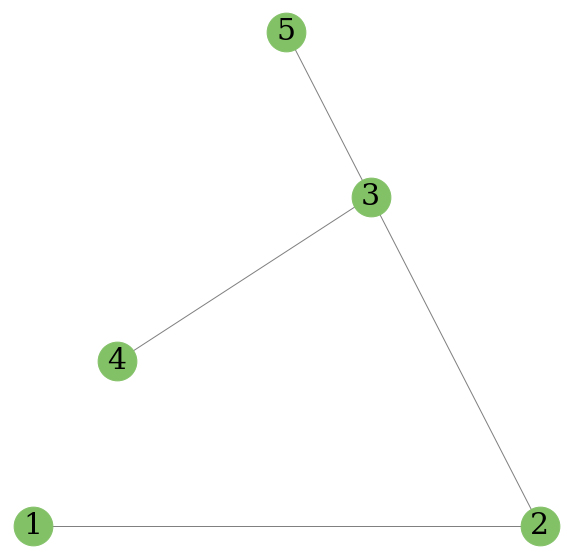

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
nx.draw(
    g, pos, with_labels=True, 
    labels=node_labels, 
    node_color='#83C167', edge_color='gray', node_size=1500, font_size=30, font_family='serif'
)

In [7]:
A_hat = D_mod_invroot @ A_mod @ D_mod_invroot
A_hat

array([[0.5       , 0.40824829, 0.        , 0.        , 0.        ],
       [0.40824829, 0.33333333, 0.28867513, 0.        , 0.        ],
       [0.        , 0.28867513, 0.25      , 0.35355339, 0.35355339],
       [0.        , 0.        , 0.35355339, 0.5       , 0.        ],
       [0.        , 0.        , 0.35355339, 0.        , 0.5       ]])

In [8]:
H = np.zeros((g.number_of_nodes(), 1))
H

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [9]:
H[0,0] = 1 # the "water drop"

In [10]:
# 
iters = 20
results = [H.flatten()]
for i in range(iters):
    H = A_hat @ H
    results.append(H.flatten())
print(f"Initial signal input: {results[0]}")
print(f"Final signal output after running {iters} steps of message-passing:  {results[-1]}")

Initial signal input: [1. 0. 0. 0. 0.]
Final signal output after running 20 steps of message-passing:  [0.1559171  0.18976912 0.21665888 0.15263111 0.15263111]


In [11]:
results

[array([1., 0., 0., 0., 0.]),
 array([0.5       , 0.40824829, 0.        , 0.        , 0.        ]),
 array([0.41666667, 0.34020691, 0.11785113, 0.        , 0.        ]),
 array([0.34722222, 0.31752645, 0.12767206, 0.04166667, 0.04166667]),
 array([0.30324074, 0.28445078, 0.15304279, 0.06597222, 0.06597222]),
 array([0.26774691, 0.26279409, 0.16702397, 0.08709491, 0.08709491]),
 array([0.24115869, 0.24512092, 0.17920351, 0.10259934, 0.10259934]),
 array([0.22064954, 0.23189119, 0.18810988, 0.11465768, 0.11465768]),
 array([0.20499395, 0.22167951, 0.19504392, 0.12383573, 0.12383573]),
 array([0.19299726, 0.21388593, 0.20031942, 0.1308763 , 0.1308763 ]),
 array([0.18381719, 0.20791335, 0.20436693, 0.13626176, 0.13626176]),
 array([0.17678887, 0.20334315, 0.20746276, 0.1403855 , 0.1403855 ]),
 array([0.17140893, 0.19984414, 0.20983334, 0.14354191, 0.14354191]),
 array([0.16729049, 0.19716578, 0.21164783, 0.14595825, 0.14595825]),
 array([0.16413784, 0.19511545, 0.21303688, 0.14780793, 0.14

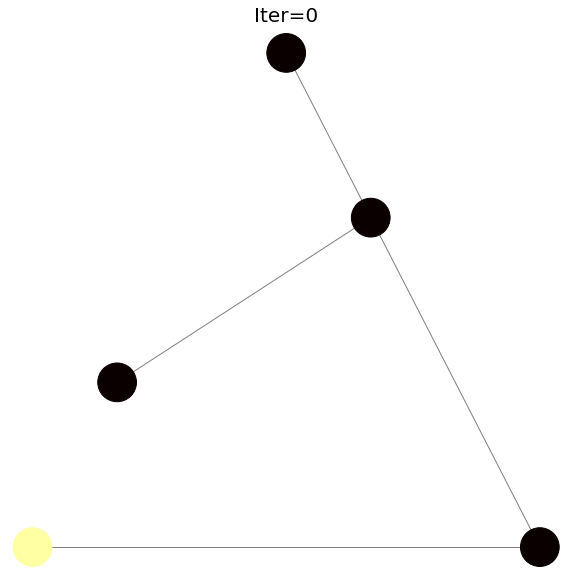

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))

kwargs = {'cmap': 'hot', 'node_size': 1500, 'edge_color': 'gray', 
          'vmin': np.array(results).min(), 'vmax': np.array(results).max()*1.1}

def update(idx):
    ax.clear()
    colors = results[idx]
    nx.draw(g, pos, node_color=colors, ax=ax, **kwargs)
    ax.set_title(f"Iter={idx}", fontsize=20)

anim = animation.FuncAnimation(fig, update, frames=len(results), interval=1000, repeat=True)


In [13]:
anim.save('water_drop_example.mp4')

In [14]:
HTML(anim.to_html5_video())

# Graph Convolution Application

In [15]:
from scipy.special import softmax
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

In [16]:
def draw_kkl(nx_G, label_map, node_color, pos=None, **kwargs):
    fig, ax = plt.subplots(figsize=(10,10))
    if pos is None:
        pos = nx.spring_layout(nx_G, k=5/np.sqrt(nx_G.number_of_nodes()))

    nx.draw(
        nx_G, pos, with_labels=label_map is not None, 
        labels=label_map, 
        node_color=node_color, 
        ax=ax, **kwargs)

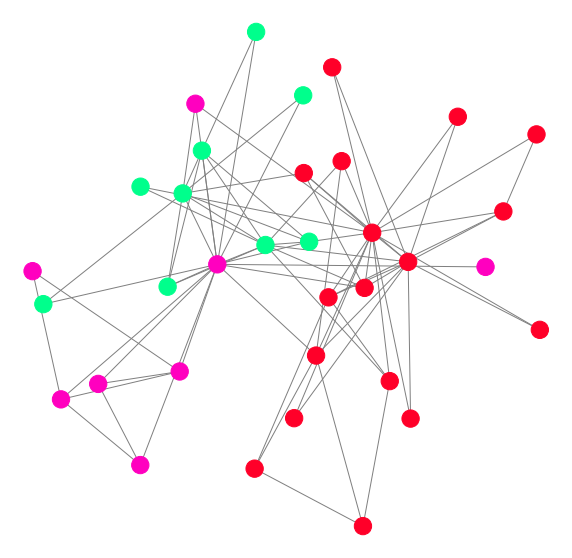

In [17]:

g = nx.karate_club_graph()
g.number_of_nodes(), g.number_of_edges()
communities = greedy_modularity_communities(g)
colors = np.zeros(g.number_of_nodes())
for i, com in enumerate(communities):
    colors[list(com)] = i

n_classes = np.unique(colors).shape[0]
labels = np.eye(n_classes)[colors.astype(int)]

club_labels = nx.get_node_attributes(g,'club')

_ = draw_kkl(g, None, colors, cmap='gist_rainbow', edge_color='gray')

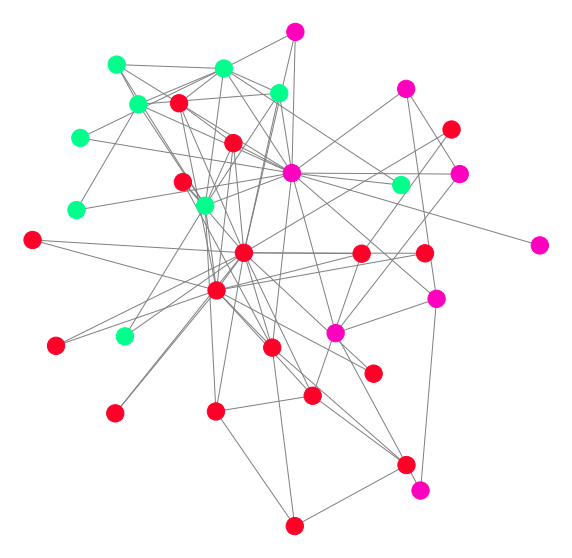

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
pos = nx.spring_layout(g, k=5/np.sqrt(g.number_of_nodes()))
kwargs = {"cmap": 'gist_rainbow', "edge_color":'gray'}
nx.draw(
    g, pos, with_labels=False, 
    node_color=colors, 
    ax=ax, **kwargs)
#plt.savefig('karate_club_graph.png', bbox_inches='tight', transparent=True)

In [19]:
# (1) Compute adjacency matrix
A = nx.to_numpy_matrix(g)
A

matrix([[0., 1., 1., ..., 1., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 1.],
        [0., 0., 1., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.]])

In [20]:
# (2) Add self connections
A_mod = A + np.eye(g.number_of_nodes())

# (3) Compute D
D_mod = np.zeros_like(A_mod)
np.fill_diagonal(D_mod, np.asarray(A_mod.sum(axis=1)).flatten())

D_mod_invroot = np.linalg.inv(sqrtm(D_mod))

A_hat = D_mod_invroot @ A_mod @ D_mod_invroot

In [21]:
X = np.eye(g.number_of_nodes())

In [22]:
def glorot_init(nin, nout):
    sd = np.sqrt(6.0 / (nin + nout))
    return np.random.uniform(-sd, sd, size=(nin, nout))


def xent(pred, labels):
    return -np.log(pred)[np.arange(pred.shape[0]), np.argmax(labels, axis=1)]


def norm_diff(dW, dW_approx):
    return np.linalg.norm(dW - dW_approx) / (np.linalg.norm(dW) + np.linalg.norm(dW_approx))


class GradDescentOptim():
    def __init__(self, lr, wd):
        self.lr = lr
        self.wd = wd
        self._y_pred = None
        self._y_true = None
        self._out = None
        self.bs = None
        self.train_nodes = None
        
    def __call__(self, y_pred, y_true, train_nodes=None):
        self.y_pred = y_pred
        self.y_true = y_true
        
        if train_nodes is None:
            self.train_nodes = np.arange(y_pred.shape[0])
        else:
            self.train_nodes = train_nodes
            
        self.bs = self.train_nodes.shape[0]
        
    @property
    def out(self):
        return self._out
    
    @out.setter
    def out(self, y):
        self._out = y
    

class GCNLayer():
    def __init__(self, n_inputs, n_outputs, activation=None, name=''):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.W = glorot_init(self.n_outputs, self.n_inputs)
        self.activation = activation
        self.name = name
        
    def __repr__(self):
        return f"GCN: W{'_'+self.name if self.name else ''} ({self.n_inputs}, {self.n_outputs})"
        
    def forward(self, A, X, W=None):
        """
        Assumes A is (bs, bs) adjacency matrix and X is (bs, D), 
            where bs = "batch size" and D = input feature length
        """
        self._X = (A @ X).T # for calculating gradients.  (D, bs)
        
        if W is None:
            W = self.W
        
        H = W @ self._X # (h, D)*(D, bs) -> (h, bs)
        if self.activation is not None:
            H = self.activation(H)
        self._H = H # (h, bs)
        return self._H.T # (bs, h)
    
    def backward(self, optim, update=True):
        dtanh = 1 - np.asarray(self._H.T)**2 # (bs, out_dim)
        d2 = np.multiply(optim.out, dtanh)  # (bs, out_dim) *element_wise* (bs, out_dim)
        
        optim.out = d2 @ self.W # (bs, out_dim)*(out_dim, in_dim) = (bs, in_dim)
        
        dW = np.asarray(d2.T @ self._X.T) / optim.bs  # (out_dim, bs)*(bs, D) -> (out_dim, D)
        dW_wd = self.W * optim.wd / optim.bs # weight decay update
        
        if update:
            self.W -= (dW + dW_wd) * optim.lr 
        
        return dW + dW_wd

    
class SoftmaxLayer():
    def __init__(self, n_inputs, n_outputs, name=''):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.W = glorot_init(self.n_outputs, self.n_inputs)
        self.b = np.zeros((self.n_outputs, 1))
        self.name = name
        self._X = None # Used to calculate gradients
        
    def __repr__(self):
        return f"Softmax: W{'_'+self.name if self.name else ''} ({self.n_inputs}, {self.n_outputs})"
    
    def shift(self, proj):
        shiftx = proj - np.max(proj, axis=0, keepdims=True)
        exps = np.exp(shiftx)
        return exps / np.sum(exps, axis=0, keepdims=True)
        
    def forward(self, X, W=None, b=None):
        """Compute the softmax of vector x in a numerically stable way.
        
        X is assumed to be (bs, h)
        """
        self._X = X.T
        if W is None:
            W = self.W
        if b is None:
            b = self.b

        proj = np.asarray(W @ self._X) + b # (out, h)*(h, bs) = (out, bs)
        return self.shift(proj).T # (bs, out)
    
    def backward(self, optim, update=True):
        # should take in optimizer, update its own parameters and update the optimizer's "out"
        # Build mask on loss
        train_mask = np.zeros(optim.y_pred.shape[0])
        train_mask[optim.train_nodes] = 1
        train_mask = train_mask.reshape((-1, 1))
        
        # derivative of loss w.r.t. activation (pre-softmax)
        d1 = np.asarray((optim.y_pred - optim.y_true)) # (bs, out_dim)
        d1 = np.multiply(d1, train_mask) # (bs, out_dim) with loss of non-train nodes set to zero
        
        optim.out = d1 @ self.W # (bs, out_dim)*(out_dim, in_dim) = (bs, in_dim)
        
        dW = (d1.T @ self._X.T) / optim.bs  # (out_dim, bs)*(bs, in_dim) -> (out_dim, in_dim)
        db = d1.T.sum(axis=1, keepdims=True) / optim.bs # (out_dim, 1)
                
        dW_wd = self.W * optim.wd / optim.bs # weight decay update
        
        if update:   
            self.W -= (dW + dW_wd) * optim.lr
            self.b -= db.reshape(self.b.shape) * optim.lr
        
        return dW + dW_wd, db.reshape(self.b.shape)

In [23]:
gcn1 = GCNLayer(g.number_of_nodes(), 2, activation=np.tanh, name='1')
sm1 = SoftmaxLayer(2, n_classes, "SM")
opt = GradDescentOptim(lr=0, wd=1.)
gcn1_out = gcn1.forward(A_hat, X)
opt(sm1.forward(gcn1_out), labels)

In [24]:
def get_grads(inputs, layer, argname, labels, eps=1e-4, wd=0):
    cp = getattr(layer, argname).copy()
    cp_flat = np.asarray(cp).flatten()
    grads = np.zeros_like(cp_flat)
    n_parms = cp_flat.shape[0]
    for i, theta in enumerate(cp_flat):
        #print(f"Parm {argname}_{i}")
        theta_cp = theta
        
        # J(theta + eps)
        cp_flat[i] = theta + eps
        cp_tmp = cp_flat.reshape(cp.shape)
        predp = layer.forward(*inputs, **{argname: cp_tmp})
        wd_term = wd/2*(cp_flat**2).sum() / labels.shape[0]
        #print(wd_term)
        Jp = xent(predp, labels).mean() + wd_term
        
        # J(theta - eps)
        cp_flat[i] = theta - eps
        cp_tmp = cp_flat.reshape(cp.shape)
        predm = layer.forward(*inputs, **{argname: cp_tmp})
        wd_term = wd/2*(cp_flat**2).sum() / labels.shape[0]
        #print(wd_term)
        Jm = xent(predm, labels).mean() + wd_term
        
        # grad
        grads[i] = ((Jp - Jm) / (2*eps))
        
        # Back to normal
        cp_flat[i] = theta

    return grads.reshape(cp.shape)

In [25]:
dW_approx = get_grads((gcn1_out,), sm1, "W", labels, eps=1e-4, wd=opt.wd)
db_approx = get_grads((gcn1_out,), sm1, "b", labels, eps=1e-4, wd=opt.wd)

In [26]:
dW, db = sm1.backward(opt, update=False)

In [27]:
assert norm_diff(dW, dW_approx) < 1e-7
assert norm_diff(db, db_approx) < 1e-7

In [28]:

def get_gcn_grads(inputs, gcn, sm_layer, labels, eps=1e-4, wd=0):
    cp = gcn.W.copy()
    cp_flat = np.asarray(cp).flatten()
    grads = np.zeros_like(cp_flat)
    n_parms = cp_flat.shape[0]
    for i, theta in enumerate(cp_flat):
        theta_cp = theta
        
        # J(theta + eps)
        cp_flat[i] = theta + eps
        cp_tmp = cp_flat.reshape(cp.shape)
        pred = sm_layer.forward(gcn.forward(*inputs, W=cp_tmp))
        w2 = (cp_flat**2).sum()+(sm_layer.W.flatten()**2).sum()
        Jp = xent(pred, labels).mean() + wd/(2*labels.shape[0])*w2
        
        # J(theta - eps)
        cp_flat[i] = theta - eps
        cp_tmp = cp_flat.reshape(cp.shape)
        pred = sm_layer.forward(gcn.forward(*inputs, W=cp_tmp))
        w2 = (cp_flat**2).sum()+(sm_layer.W.flatten()**2).sum()
        Jm = xent(pred, labels).mean() + wd/(2*labels.shape[0])*w2
        
        # grad
        grads[i] = ((Jp - Jm) / (2*eps))
        
        # Back to normal
        cp_flat[i] = theta

    return grads.reshape(cp.shape)

In [29]:
dW2 = gcn1.backward(opt, update=False)

In [30]:
dW2_approx = get_gcn_grads((A_hat, X), gcn1, sm1, labels, eps=1e-4, wd=opt.wd)

In [31]:
assert norm_diff(dW2, dW2_approx) < 1e-7

In [32]:

class GCNNetwork():
    def __init__(self, n_inputs, n_outputs, n_layers, hidden_sizes, activation, seed=0):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.n_layers = n_layers
        self.hidden_sizes = hidden_sizes
        self.activation = activation
        
        np.random.seed(seed)
        
        self.layers = list()
        # Input layer
        gcn_in = GCNLayer(n_inputs, hidden_sizes[0], activation, name='in')
        self.layers.append(gcn_in)
        
        # Hidden layers
        for layer in range(n_layers):
            gcn = GCNLayer(self.layers[-1].W.shape[0], hidden_sizes[layer], activation, name=f'h{layer}')
            self.layers.append(gcn)
            
        # Output layer
        sm_out = SoftmaxLayer(hidden_sizes[-1], n_outputs, name='sm')
        self.layers.append(sm_out)
        
    def __repr__(self):
        return '\n'.join([str(l) for l in self.layers])
    
    def embedding(self, A, X):
        # Loop through all GCN layers
        H = X
        for layer in self.layers[:-1]:
            H = layer.forward(A, H)
        return np.asarray(H)
    
    def forward(self, A, X):
        # GCN layers
        H = self.embedding(A, X)
        
        # Softmax
        p = self.layers[-1].forward(H)
        
        return np.asarray(p)

In [33]:

gcn_model = GCNNetwork(
    n_inputs=g.number_of_nodes(), 
    n_outputs=n_classes, 
    n_layers=2,
    hidden_sizes=[16, 2], 
    activation=np.tanh,
    seed=100,
)
gcn_model

GCN: W_in (34, 16)
GCN: W_h0 (16, 16)
GCN: W_h1 (16, 2)
Softmax: W_sm (2, 3)

In [34]:
y_pred = gcn_model.forward(A_hat, X)
embed = gcn_model.embedding(A_hat, X)
xent(y_pred, labels).mean()

1.0759636138197175

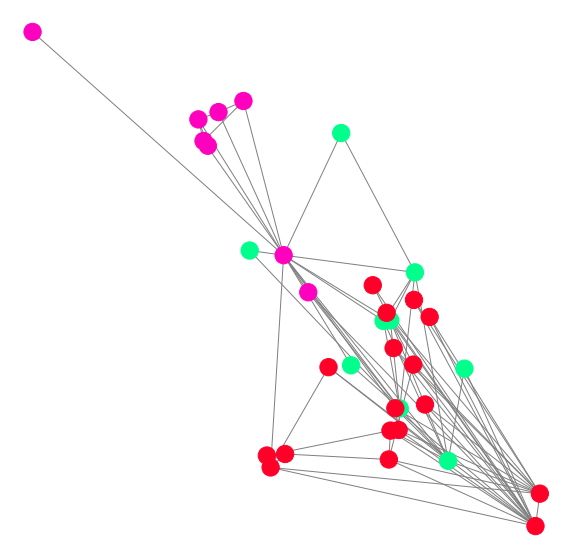

In [35]:
pos = {i: embed[i,:] for i in range(embed.shape[0])}
_ = draw_kkl(g, None, colors, pos=pos, cmap='gist_rainbow', edge_color='gray')

In [36]:
train_nodes = np.array([0, 1, 8])
test_nodes = np.array([i for i in range(labels.shape[0]) if i not in train_nodes])
opt2 = GradDescentOptim(lr=2e-2, wd=2.5e-2)

In [37]:

embeds = list()
accs = list()
train_losses = list()
test_losses = list()

loss_min = 1e6
es_iters = 0
es_steps = 50
# lr_rate_ramp = 0 #-0.05
# lr_ramp_steps = 1000

for epoch in range(15000):
    
    y_pred = gcn_model.forward(A_hat, X)

    opt2(y_pred, labels, train_nodes)
    
#     if ((epoch+1) % lr_ramp_steps) == 0:
#         opt2.lr *= 1+lr_rate_ramp
#         print(f"LR set to {opt2.lr:.4f}")

    for layer in reversed(gcn_model.layers):
        layer.backward(opt2, update=True)
        
    embeds.append(gcn_model.embedding(A_hat, X))
    # Accuracy for non-training nodes
    acc = (np.argmax(y_pred, axis=1) == np.argmax(labels, axis=1))[
        [i for i in range(labels.shape[0]) if i not in train_nodes]
    ]
    accs.append(acc.mean())
    
    loss = xent(y_pred, labels)
    loss_train = loss[train_nodes].mean()
    loss_test = loss[test_nodes].mean()
    
    train_losses.append(loss_train)
    test_losses.append(loss_test)
    
    if loss_test < loss_min:
        loss_min = loss_test
        es_iters = 0
    else:
        es_iters += 1
        
    if es_iters > es_steps:
        print("Early stopping!")
        break
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch+1}, Train Loss: {loss_train:.3f}, Test Loss: {loss_test:.3f}")
        
train_losses = np.array(train_losses)
test_losses = np.array(test_losses)

Epoch: 1, Train Loss: 1.088, Test Loss: 1.075
Epoch: 101, Train Loss: 1.035, Test Loss: 1.035
Epoch: 201, Train Loss: 0.964, Test Loss: 0.972
Epoch: 301, Train Loss: 0.860, Test Loss: 0.875
Epoch: 401, Train Loss: 0.725, Test Loss: 0.751
Epoch: 501, Train Loss: 0.584, Test Loss: 0.635
Epoch: 601, Train Loss: 0.465, Test Loss: 0.549
Epoch: 701, Train Loss: 0.364, Test Loss: 0.483
Epoch: 801, Train Loss: 0.282, Test Loss: 0.433
Epoch: 901, Train Loss: 0.222, Test Loss: 0.399
Epoch: 1001, Train Loss: 0.180, Test Loss: 0.376
Epoch: 1101, Train Loss: 0.151, Test Loss: 0.363
Epoch: 1201, Train Loss: 0.131, Test Loss: 0.354
Epoch: 1301, Train Loss: 0.116, Test Loss: 0.349
Epoch: 1401, Train Loss: 0.105, Test Loss: 0.345
Epoch: 1501, Train Loss: 0.096, Test Loss: 0.342
Epoch: 1601, Train Loss: 0.089, Test Loss: 0.341
Epoch: 1701, Train Loss: 0.084, Test Loss: 0.339
Epoch: 1801, Train Loss: 0.079, Test Loss: 0.338
Epoch: 1901, Train Loss: 0.075, Test Loss: 0.337
Epoch: 2001, Train Loss: 0.072, 

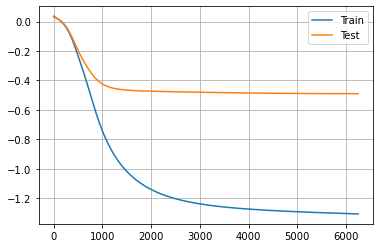

In [38]:
fig, ax = plt.subplots()
ax.plot(np.log10(train_losses), label='Train')
ax.plot(np.log10(test_losses), label='Test')
ax.legend()
ax.grid()

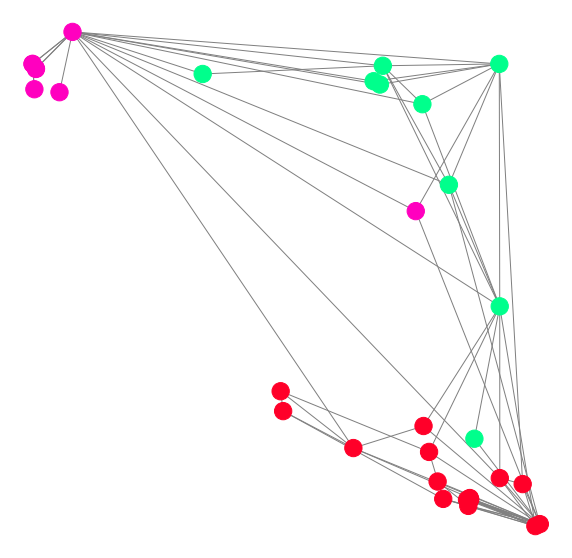

In [39]:
pos = {i: embeds[-1][i,:] for i in range(embeds[-1].shape[0])}
_ = draw_kkl(g, None, colors, pos=pos, cmap='gist_rainbow', edge_color='gray')

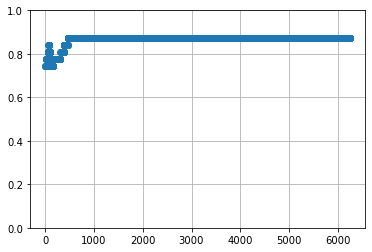

In [40]:
fig, ax = plt.subplots()
_ = ax.plot(accs, marker='o')
ax.grid()
_ = ax.set(ylim=[0,1])

In [41]:
N = 500
snapshots = np.linspace(0, len(embeds)-1, N).astype(int)

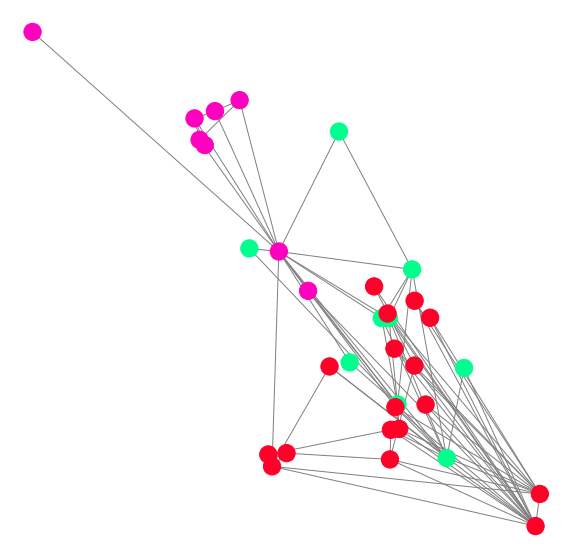

In [42]:
# Build plot
fig, ax = plt.subplots(figsize=(10, 10))
kwargs = {'cmap': 'gist_rainbow', 'edge_color': 'gray', }#'node_size': 55}

def update(idx):
    ax.clear()
    embed = embeds[snapshots[idx]]
    pos = {i: embed[i,:] for i in range(embed.shape[0])}
    nx.draw(g, pos, node_color=colors, ax=ax, **kwargs)

anim = animation.FuncAnimation(fig, update, frames=snapshots.shape[0], interval=10, repeat=False)

In [43]:
HTML(anim.to_html5_video())

In [44]:
anim.save('embed_anim.mp4', dpi=300)